# Visualizations for Experiment Zero

In [2]:
import glob
import matplotlib.pyplot as plt
import os
import pandas as pd

from tabulate import tabulate

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.figsize': (8, 6),
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.5,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.loc': 'best',
    'grid.alpha': 0.7,
    'grid.linestyle': '--',
    'grid.color': 'gray',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.minor.size': 3,
    'ytick.minor.size': 3,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.minor.width': 0.6,
    'ytick.minor.width': 0.6,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.labelpad': 10,
    'axes.titlepad': 15,
    'figure.autolayout': True
})

In [14]:
baseline_vanilla_path = '/home/kyle/VLMEvalKit/outputs/alpha_sweep_llava_3/alpha_baseline/llava_v1.5_7b'
baseline_modified_path = '/home/kyle/VLMEvalKit/outputs/alpha_sweep_llava_3/alpha_0.0/llava_v1.5_7b_qtvit'

alpha_sweep_path = '/home/kyle/VLMEvalKit/outputs/alpha_sweep_llava_4_bilinear'

In [22]:
def get_results(
    file_name: str, 
    base_dir: str=alpha_sweep_path,
    baseline_vanilla_path: str=baseline_vanilla_path,
    baseline_modified_path: str=baseline_modified_path,
    include_vanilla: bool=False # My experiments suggest that the vanilla run is identical to the modified run
):
    results = []

    for _, dirs, _ in os.walk(base_dir):
        for dir_name in dirs:
            if glob.fnmatch.fnmatch(dir_name, 'alpha_*.*'):
                csv_file = os.path.join(base_dir, dir_name, f'llava_v1.5_7b_qtvit/llava_v1.5_7b_qtvit_{file_name}.csv')
                if os.path.exists(csv_file):
                    df = pd.read_csv(csv_file)
                    alpha_value = dir_name.split('_')[1]
                    df['alpha'] = float(alpha_value)
                    results.append(df)

    # Concatenate all the results into a single DataFrame
    all_results = pd.concat(results, ignore_index=True)

    # baseline_modified = pd.read_csv(f'{baseline_modified_path}/llava_next_vicuna_7b_{file_name}.csv')
    # baseline_modified['alpha'] = 0

    if include_vanilla:
        baseline_vanilla = pd.read_csv(f'{baseline_vanilla_path}/llava_v1.5_7b_{file_name}.csv')
        baseline_vanilla['alpha'] = -0.01
        result_sets = [all_results, baseline_vanilla]
    else:
        result_sets = [all_results]

    all_results = pd.concat(result_sets, ignore_index=True)

    return all_results

In [23]:
def clean_and_print(all_results: pd.DataFrame):
    all_results = all_results.sort_values(by='alpha')

    all_results.set_index('alpha', inplace=True)
    print(tabulate(all_results, headers='keys', tablefmt='grid'))

In [24]:
pope = get_results('POPE_score', include_vanilla=True)
pope = pope[pope['split'] == 'Overall']

mmbench = get_results('MMBench_DEV_EN_acc', include_vanilla=True)
# abench = get_results('A-Bench_VAL_acc', include_vanilla=True)

# sciqa = get_results('ScienceQA_VAL_acc', include_vanilla=True)

In [25]:
clean_and_print(pope)
clean_and_print(mmbench)
# clean_and_print(abench)
# clean_and_print(sciqa)

+---------+---------+-----------+---------+-------------+----------+
|   alpha | split   |   Overall |     acc |   precision |   recall |
+=========+=========+===========+=========+=============+==========+
|   -0.01 | Overall |   74.4282 | 74.6556 |     88.9163 |  64      |
+---------+---------+-----------+---------+-------------+----------+
|    0    | Overall |   41.8276 | 45.7444 |     71.2681 |  29.6    |
+---------+---------+-----------+---------+-------------+----------+
|    1    | Overall |   48.1832 | 60.7    |     76.9756 |  35.0667 |
+---------+---------+-----------+---------+-------------+----------+
|    2    | Overall |   44.9595 | 61.0667 |     78.7104 |  31.4667 |
+---------+---------+-----------+---------+-------------+----------+
|    3    | Overall |   44.3478 | 61.4778 |     80.5263 |  30.6    |
+---------+---------+-----------+---------+-------------+----------+
|    4    | Overall |   43.4639 | 61.7889 |     83.8628 |  29.3333 |
+---------+---------+-----------+-

/tmp/ipykernel_3566362/2966851587.py:19: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  all_results[column][0:].plot(ax=axes[i], title=None, marker='*', markersize=15, linewidth=1, color='red', markeredgecolor='black')
/tmp/ipykernel_3566362/2966851587.py:19: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  all_results[column][0:].plot(ax=axes[i], title=None, marker='*', markersize=15, linewidth=1, color='red', markeredgecolor='black')
/tmp/ipykernel_3566362/2966851587.py:19: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use ob

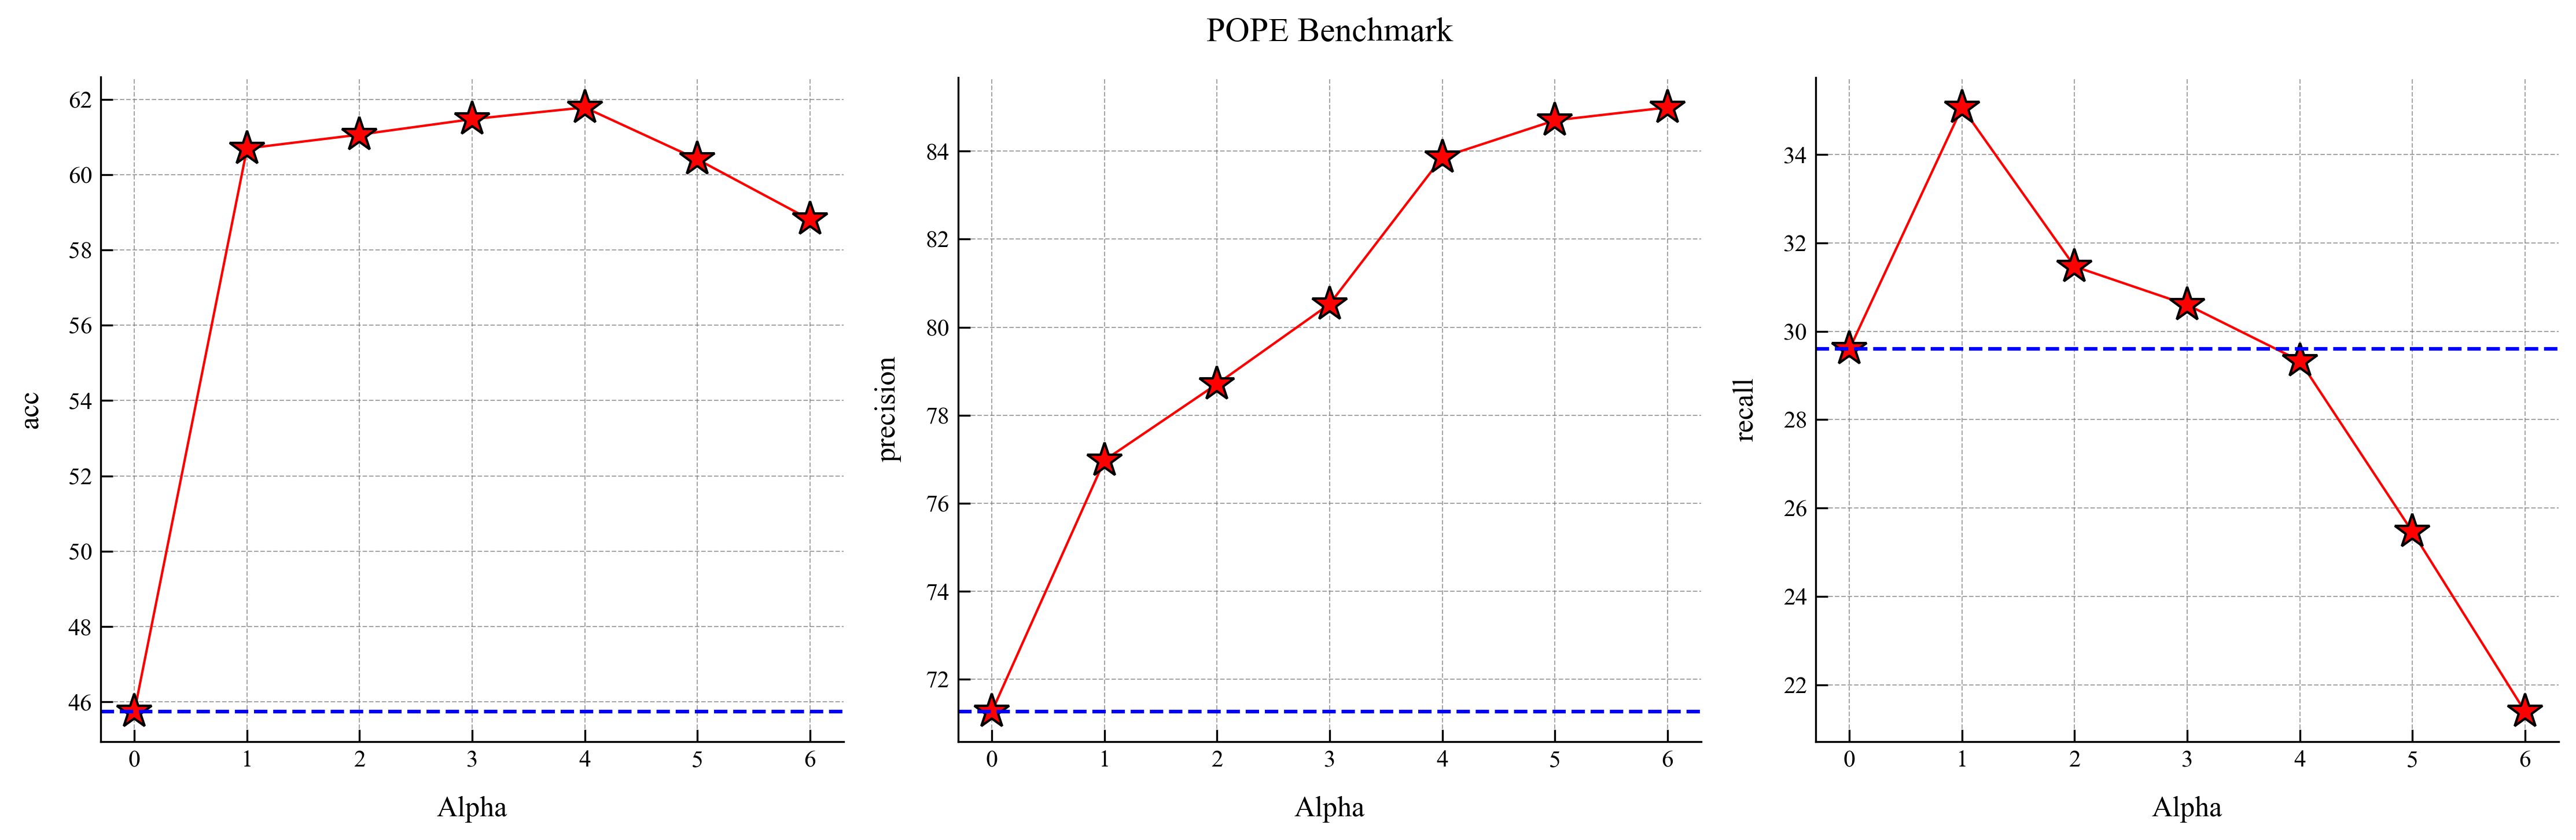

In [26]:
all_results = pope

all_results = all_results.sort_values(by='alpha')
all_results.set_index('alpha', inplace=True)

# columns = ['Overall', 'AR', 'CP', 'FP-C', 'FP-S', 'LR', 'RR']
# column_names = ['Overall', 'Attribute Reasoning', 'Coarse Perception', 'Fine-Grained Perception (Instance)',
#                 'Fine-Grained Perception (Cross-Instance)', 'Logical Reasoning', 'Relation Reasoning']
columns = [name for name in all_results.columns if name not in ['split', 'alpha', 'Overall']]
column_names = [name for name in columns]

num_columns = len(columns)
num_rows = (num_columns + 2) // 3  # Adjust the number of rows based on the number of columns

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(columns):
    all_results[column][0:].plot(ax=axes[i], title=None, marker='*', markersize=15, linewidth=1, color='red', markeredgecolor='black')
    axes[i].set_xlabel('Alpha')
    axes[i].set_ylabel(column)
    axes[i].axhline(y=all_results[column][0], color='blue', linestyle='--')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

axes[1].set_title('POPE Benchmark')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3566362/2353801132.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  all_results[column][0:].plot(ax=axes[i], title=None, marker='*', markersize=15, linewidth=1, color='red', markeredgecolor='black')


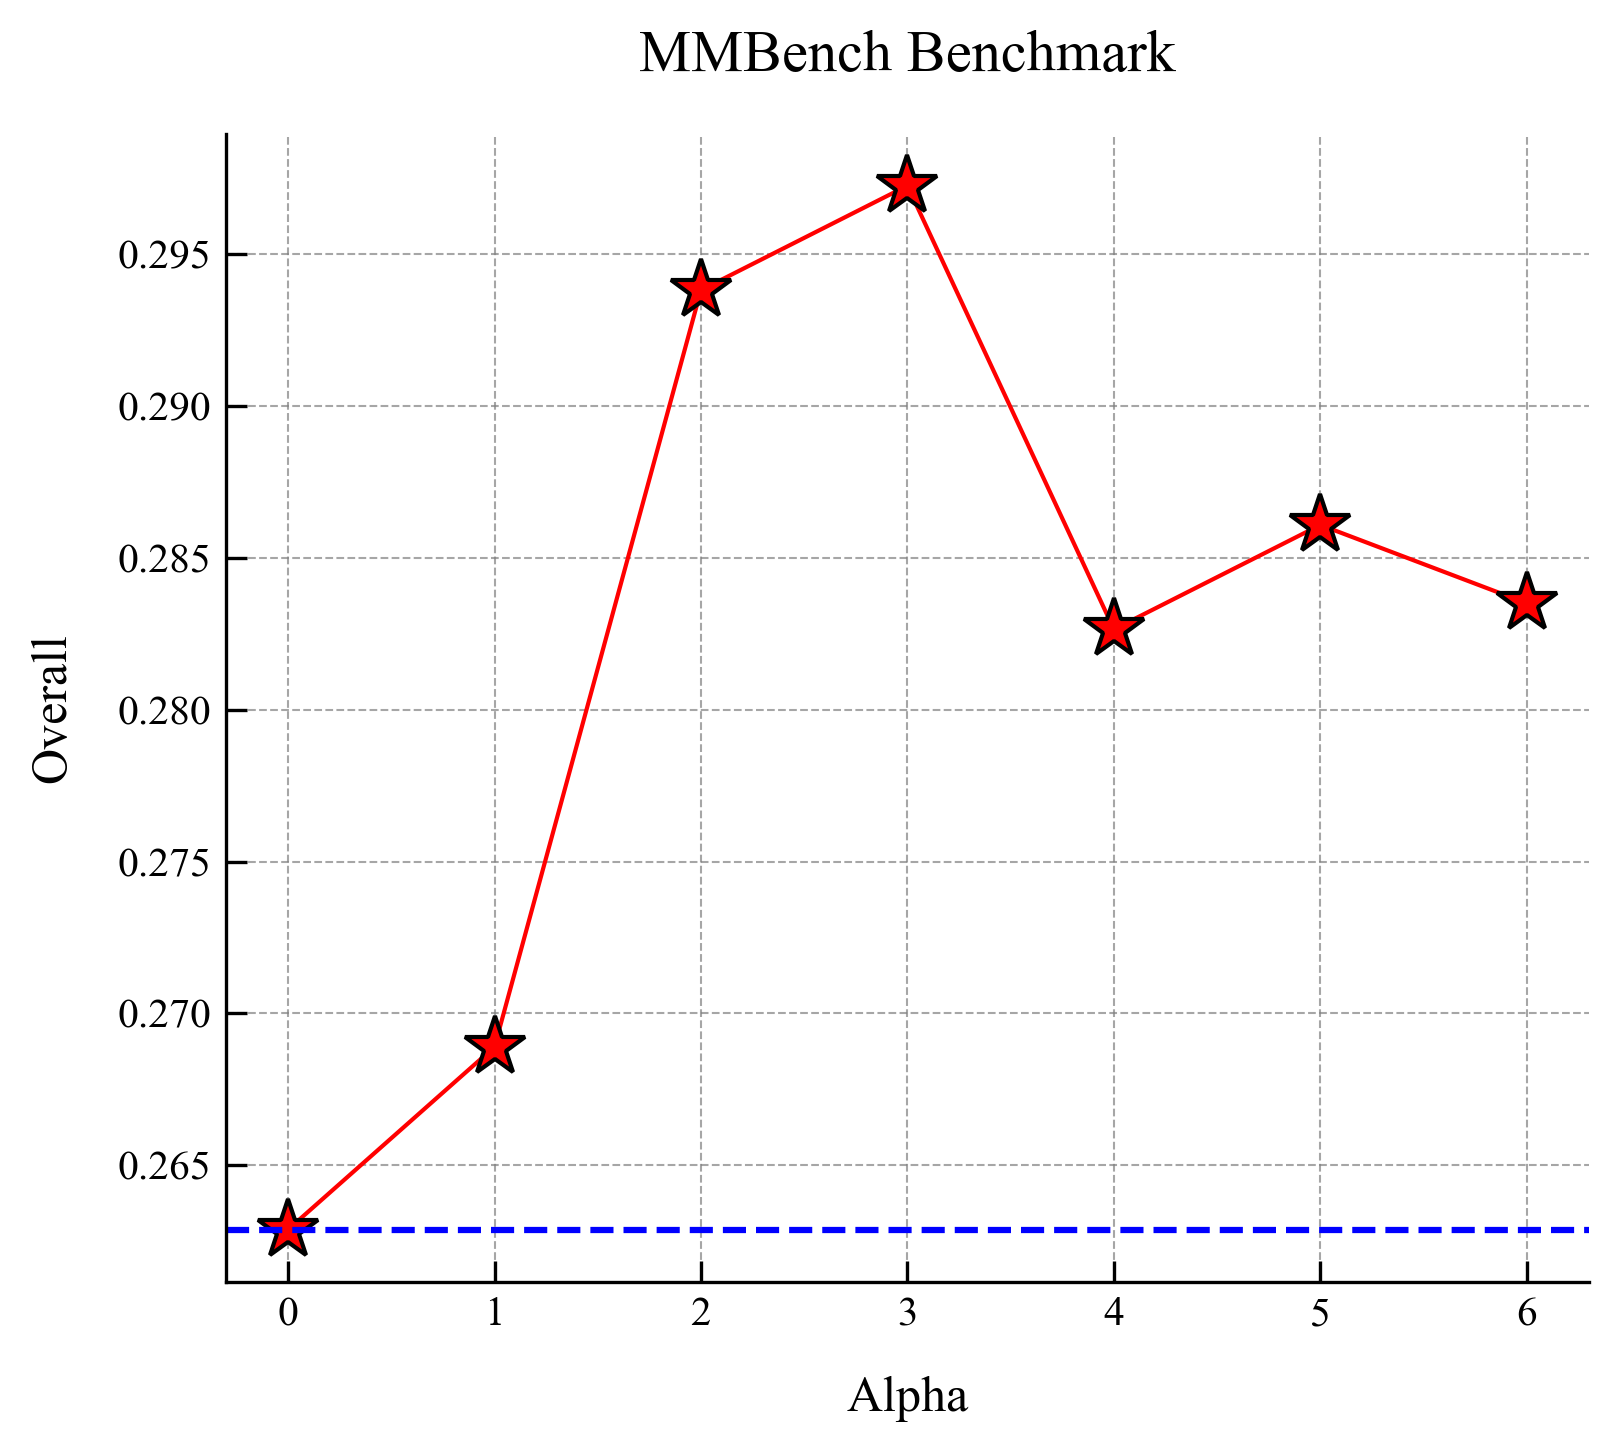

In [27]:
all_results = mmbench

all_results = all_results.sort_values(by='alpha')
all_results.set_index('alpha', inplace=True)

# columns = ['Overall', 'AR', 'CP', 'FP-C', 'FP-S', 'LR', 'RR']
# column_names = ['Overall', 'Attribute Reasoning', 'Coarse Perception', 'Fine-Grained Perception (Instance)',
#                 'Fine-Grained Perception (Cross-Instance)', 'Logical Reasoning', 'Relation Reasoning']
# columns = [name for name in all_results.columns if name not in ['split', 'alpha']]
columns = ['Overall']
column_names = [name for name in columns]

num_columns = len(columns)
num_rows = (num_columns + 2) // 3  # Adjust the number of rows based on the number of columns

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(columns):
    all_results[column][0:].plot(ax=axes[i], title=None, marker='*', markersize=15, linewidth=1, color='red', markeredgecolor='black')
    axes[i].set_xlabel('Alpha')
    axes[i].set_ylabel(column)
    axes[i].axhline(y=all_results[column][0], color='blue', linestyle='--')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

axes[0].set_title('MMBench Benchmark')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3386826/3958049888.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  all_results[column][0:].plot(ax=axes[i], title=None, marker='*', markersize=15, linewidth=1, color='red', markeredgecolor='black')


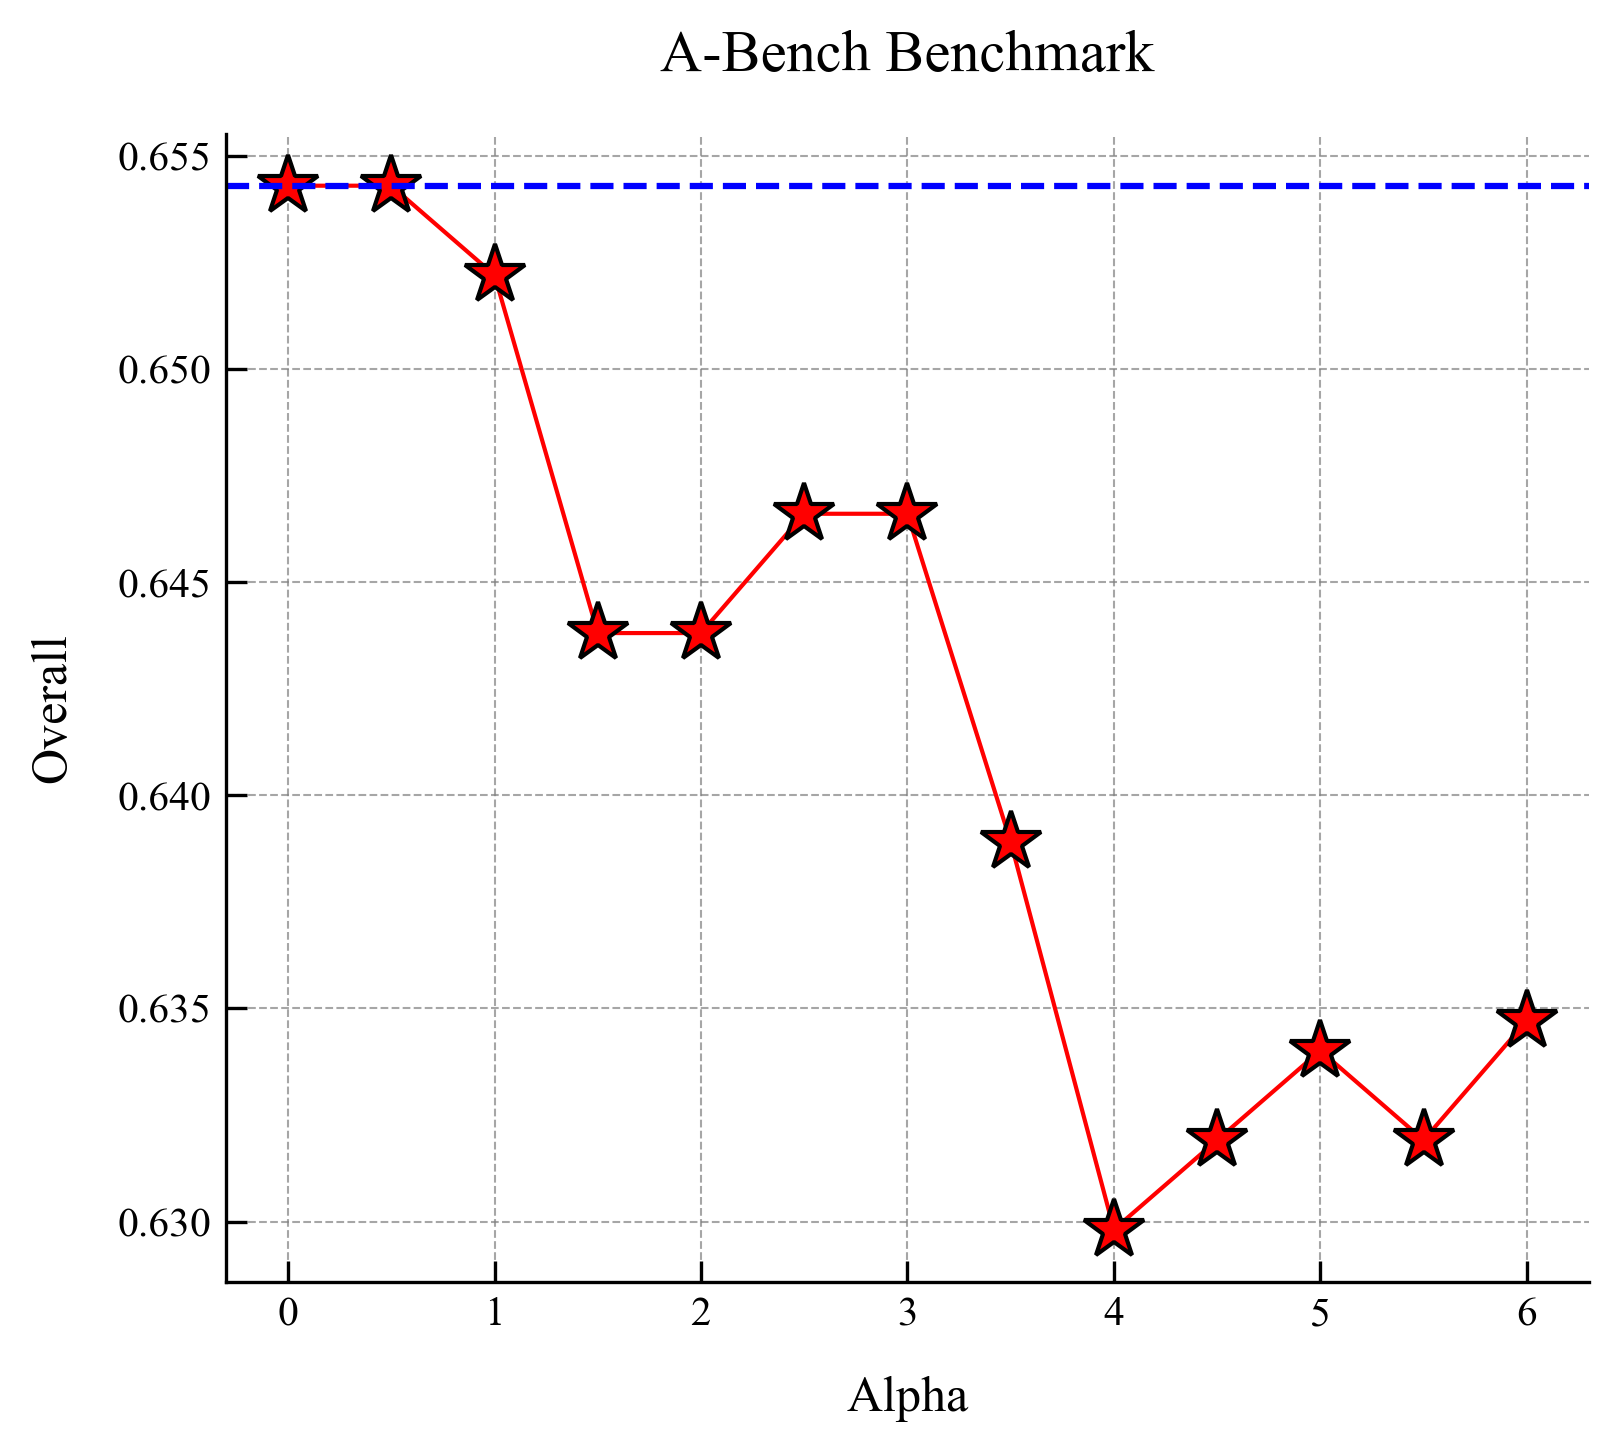

In [63]:
all_results = abench

all_results = all_results.sort_values(by='alpha')
all_results.set_index('alpha', inplace=True)

# columns = ['Overall', 'AR', 'CP', 'FP-C', 'FP-S', 'LR', 'RR']
# column_names = ['Overall', 'Attribute Reasoning', 'Coarse Perception', 'Fine-Grained Perception (Instance)',
#                 'Fine-Grained Perception (Cross-Instance)', 'Logical Reasoning', 'Relation Reasoning']
# columns = [name for name in all_results.columns if name not in ['split', 'alpha']]
columns = ['Overall']
column_names = [name for name in columns]

num_columns = len(columns)
num_rows = (num_columns + 2) // 3  # Adjust the number of rows based on the number of columns

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(columns):
    all_results[column][0:].plot(ax=axes[i], title=None, marker='*', markersize=15, linewidth=1, color='red', markeredgecolor='black')
    axes[i].set_xlabel('Alpha')
    axes[i].set_ylabel(column)
    axes[i].axhline(y=all_results[column][0], color='blue', linestyle='--')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

axes[0].set_title('A-Bench Benchmark')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3386826/2996054330.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  all_results[column][0:].plot(ax=axes[i], title=None, marker='*', markersize=15, linewidth=1, color='red', markeredgecolor='black')


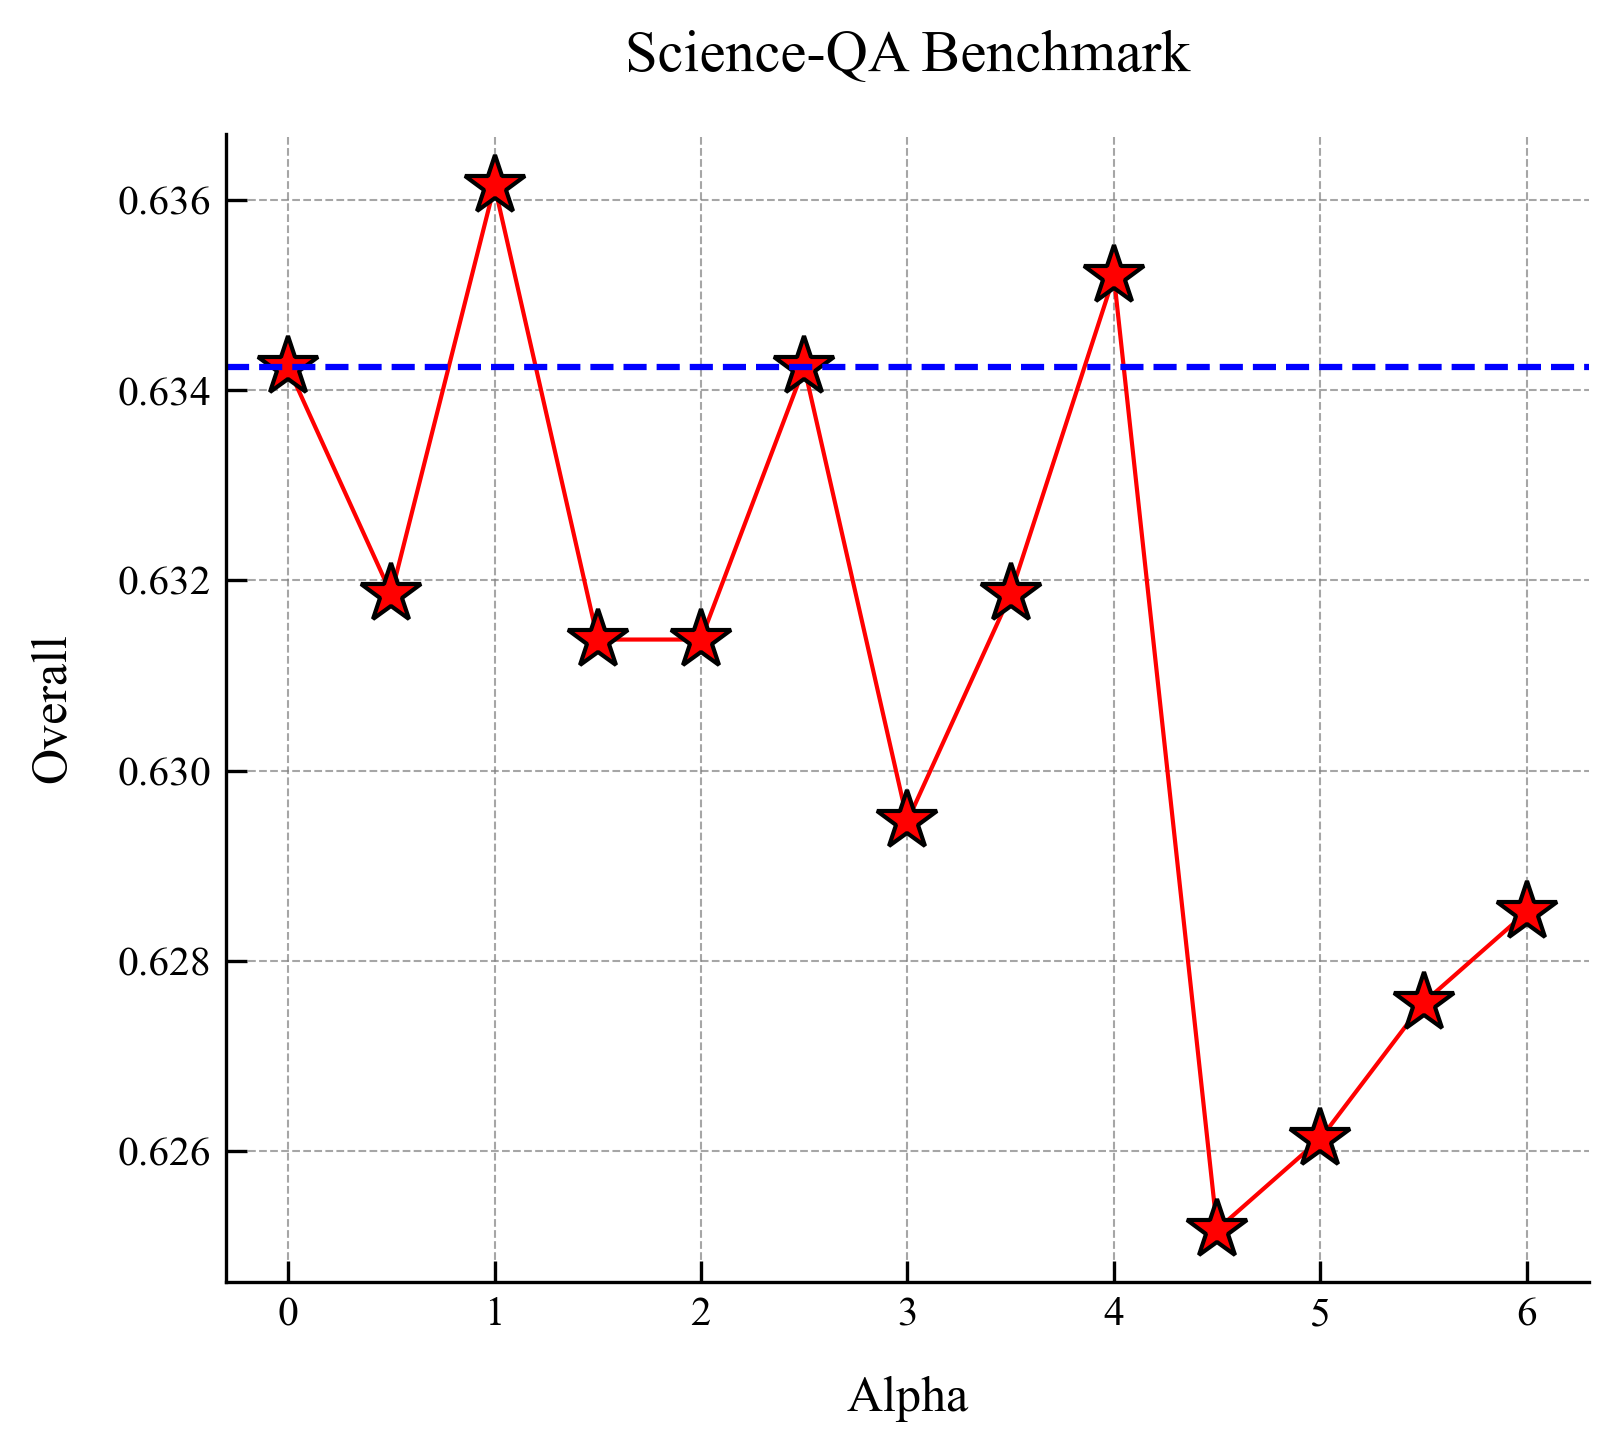

In [64]:
all_results = sciqa

all_results = all_results.sort_values(by='alpha')
all_results.set_index('alpha', inplace=True)

# columns = ['Overall', 'AR', 'CP', 'FP-C', 'FP-S', 'LR', 'RR']
# column_names = ['Overall', 'Attribute Reasoning', 'Coarse Perception', 'Fine-Grained Perception (Instance)',
#                 'Fine-Grained Perception (Cross-Instance)', 'Logical Reasoning', 'Relation Reasoning']
# columns = [name for name in all_results.columns if name not in ['split', 'alpha']]
columns = ['Overall']
column_names = [name for name in columns]

num_columns = len(columns)
num_rows = (num_columns + 2) // 3  # Adjust the number of rows based on the number of columns

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(columns):
    all_results[column][0:].plot(ax=axes[i], title=None, marker='*', markersize=15, linewidth=1, color='red', markeredgecolor='black')
    axes[i].set_xlabel('Alpha')
    axes[i].set_ylabel(column)
    axes[i].axhline(y=all_results[column][0], color='blue', linestyle='--')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

axes[0].set_title('Science-QA Benchmark')
plt.tight_layout()
plt.show()

## Flop Computations

I started tracking the number of tokens for each of the seen images.